# EDA
This notebook contains my exploratory data analysis for my capstone project. I will also be analysing customer transactions between 2009-12-01 to 2010-12-09. To do this, I have created dataframes for products, orders and prices. My goal is to; build a Single Customer View, find out the biggest spenders and frequent shoppers. I will also be looking at revenue and orders over time. 

## Import relevant libraries

In [1]:
import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt
import seaborn as sns

## Functions

In [2]:
def clean_df(df):
    
    ''' Cleans the data by getting rid of all adminstration inputs, returns, duplicates and nulls. '''
    
    ## Rename CustomerID
    df.rename(columns={'Customer ID':'CustomerID'}, inplace=True)
    
    # Drop duplicates and nulls
    df.dropna(subset=['Description'], inplace=True)
    df.drop_duplicates(inplace=True)
    
    # Convert InvoiceDate data types
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
    df['CustomerID'] = df['CustomerID'].astype('object')
    
    # Keeping formatting consistent
    df['Description'] = df['Description'].str.upper()
    df['StockCode'] = df['StockCode'].str.upper()
    
    ## Dropping adminstration related transactions by StockCode
    admin_codes=['POST','DOT','TEST002', 'TEST001','S','M','GIFT_0001_10', 'GIFT_0001_20',
                'GIFT_0001_30', 'GIFT_0001_40', 'GIFT_0001_50', 'GIFT_0001_70', 'GIFT_0001_80',
                'PADS', 'D', 'C2','BANK CHARGES', 'B', 'AMAZONFEE', 'ADJUST2', 'ADJUST']
    admin_indexes = df[df['StockCode'].isin(admin_codes)].index
    df.drop(admin_indexes, inplace=True)
    
    # Drop returns by Invoice
    cancelled_indexes = df[df.Invoice.str.contains('C')].index
    df.drop(cancelled_indexes, inplace=True)
    
    ## Dropping more adminstration related transactions by Description
    problem_descriptions=list(df[df.Quantity<=0].sort_values(['Invoice']).Description.unique())
    problem_indexes = df[df['Description'].isin(problem_descriptions)].index
    df.drop(problem_indexes, inplace=True)
    
    ## Resolving CustomerID nulls
    df['Registered'] = np.where(df['CustomerID'].isnull()==True, 0, 1)
    
    null_invoices = list(df[df.Registered==0].Invoice.unique())
    n = len(null_invoices)
    null_count = list(range(20000,(20000+n)))
    null_dict = dict(zip(null_invoices,null_count))
    df['NullCustomerID'] = df.Invoice.map(null_dict)
    df['CustomerID'].update(df['NullCustomerID'])
    df.drop('NullCustomerID', axis=1, inplace=True)
    
    ## Creat a Count, Amount, Date and Time column
    df['Count'] = range(len(df))
    df['Amount'] = df['Quantity']*df['Price']
    df['Date'] = pd.to_datetime(df['InvoiceDate']).dt.date
    df['Time'] = pd.to_datetime(df['InvoiceDate']).dt.time
    
    df['Date'] = pd.to_datetime(df['Date'])
    
    df = df.reset_index(drop=True)
    
    return df

## Import Data

In [3]:
df = pd.read_csv('online_retail_II 2009-2010.csv')
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


## Clean data

In [4]:
clean_df(df)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Registered,Count,Amount,Date,Time
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,1,0,83.40,2009-12-01,07:45:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,1,1,81.00,2009-12-01,07:45:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,1,2,81.00,2009-12-01,07:45:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,1,3,100.80,2009-12-01,07:45:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,1,4,30.00,2009-12-01,07:45:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
502856,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530,United Kingdom,1,502856,5.90,2010-12-09,20:01:00
502857,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530,United Kingdom,1,502857,3.75,2010-12-09,20:01:00
502858,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530,United Kingdom,1,502858,3.75,2010-12-09,20:01:00
502859,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530,United Kingdom,1,502859,7.50,2010-12-09,20:01:00


# Stats

In [5]:
df.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
CustomerID             object
Country                object
Registered              int64
Count                   int64
Amount                float64
Date           datetime64[ns]
Time                   object
dtype: object

In [6]:
df.describe(include='object')

,Invoice,StockCode,Description,CustomerID,Country,Time
count,502861,502861,502861,502861.0,502861,502861
unique,20622,4083,4533,5941.0,40,764
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,14911.0,United Kingdom,11:57:00
freq,674,3410,3410,5483.0,465638,2052


In [7]:
df.describe(percentiles=[.25, .5, .75, .99])

,Quantity,Price,Registered,Count,Amount
count,502861.000000,502861.000000,502861.000000,502861.000000,502861.000000
mean,11.599657,3.423985,0.794617,251430.000000,19.497728
std,88.914639,5.102489,0.403981,145163.611195,65.793825
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.250000,1.000000,125715.000000,4.200000
50%,3.000000,2.100000,1.000000,251430.000000,10.200000
75%,12.000000,4.210000,1.000000,377145.000000,17.700000
99%,120.000000,16.980000,1.000000,497831.400000,177.600000
max,19152.000000,1157.150000,1.000000,502860.000000,15818.400000


#### Notes
- 'WHITE HANGING HEART T-LIGHT HOLDER' is the most popular product
- 4533 products 
- Customers typically buy 11.6 of each product spending £19.50
- 5941 customers

In [8]:
## Group by invoice to find the stats on each order
df.groupby('Invoice')[['Quantity', 'Price', 'Amount', 'Count']].agg({'Quantity':['sum'], 'Price':['median'], 'Amount':['sum'], 'Count':['count']})

,Quantity,Price,Amount,Count
,sum,median,sum,count
Invoice,,,,
489434,166,4.025,505.30,8
489435,60,2.550,145.80,4
489436,193,3.390,630.33,19
489437,145,2.950,310.75,23
489438,826,2.400,2286.24,17
...,...,...,...,...
538167,125,2.100,298.95,25
538168,162,1.650,310.45,29


In [9]:
df[df.Invoice=='489434']

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Registered,Count,Amount,Date,Time
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,1,0,83.4,2009-12-01,07:45:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,1,1,81.0,2009-12-01,07:45:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,1,2,81.0,2009-12-01,07:45:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,1,3,100.8,2009-12-01,07:45:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,1,4,30.0,2009-12-01,07:45:00
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085,United Kingdom,1,5,39.6,2009-12-01,07:45:00
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,1,6,30.0,2009-12-01,07:45:00
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085,United Kingdom,1,7,59.5,2009-12-01,07:45:00


### I want to find:
- The biggest spenders
- Frequent shopper
- The value of unregistered customers
- Predict traffic, profit, demand
- SCV showing spending, how often, latest invoicedate

### Visualisations

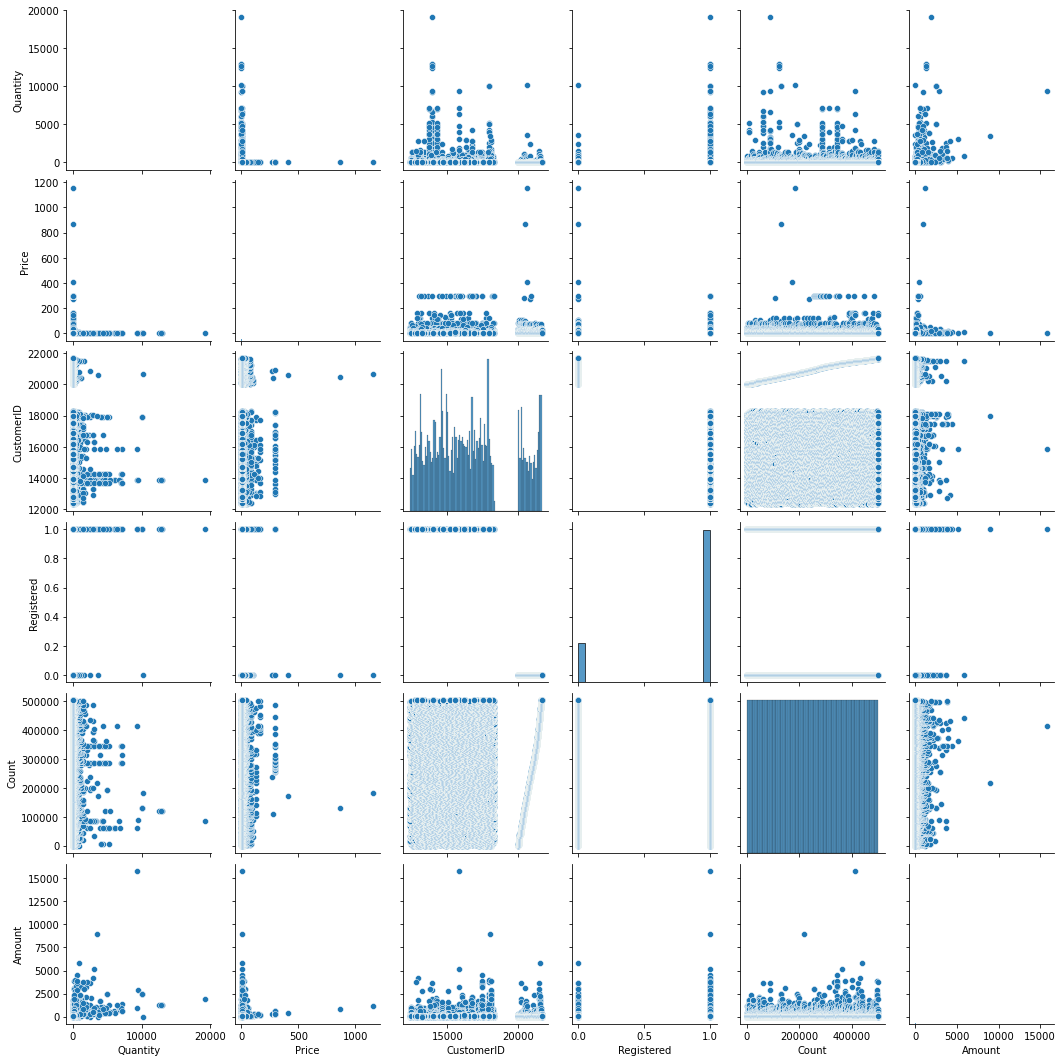

In [10]:
sns.pairplot(df)

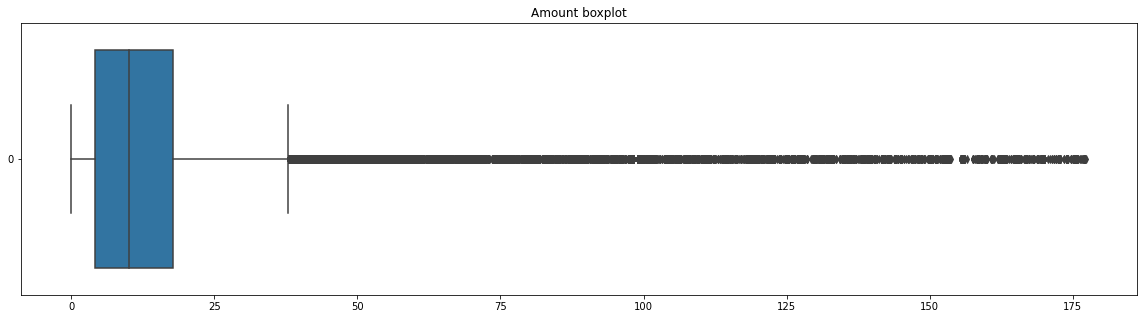

In [11]:
plt.figure(figsize=(20,5))
sns.boxplot(data = df[df['Amount']<df['Amount'].quantile(0.99)]['Amount'], orient='h')
plt.title('Amount boxplot')
plt.show()

In [12]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'CustomerID', 'Country', 'Registered', 'Count', 'Amount',
       'Date', 'Time'],
      dtype='object')

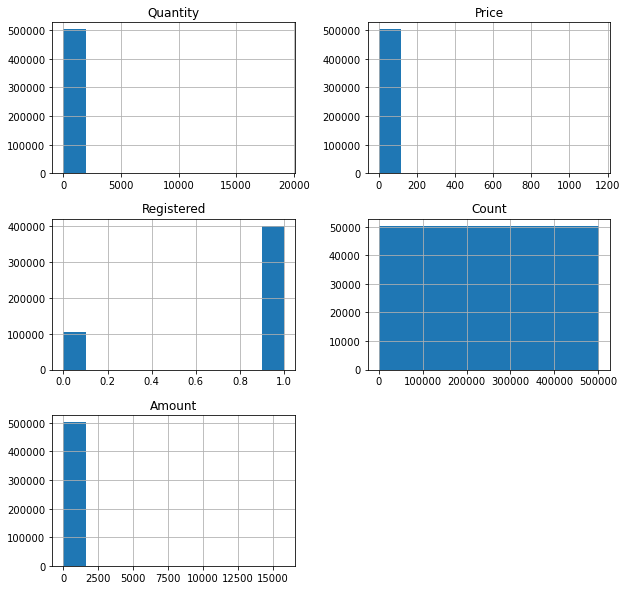

In [13]:
df.hist(figsize=(10,10))
plt.show()

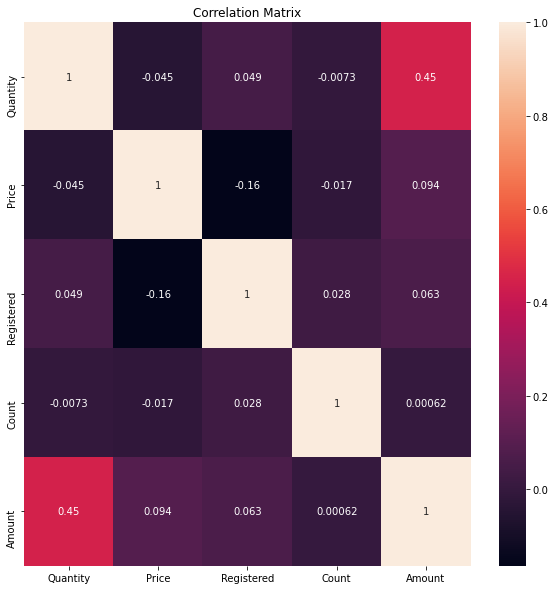

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Matrix')
plt.show()

### Price

In [15]:
prices = df.groupby('Description')[['Price']].mean()
prices.describe(percentiles=[.25, .5, .75, .99])

,Price
count,4533.000000
mean,4.319384
std,9.391797
min,0.000000
25%,1.414286
50%,2.550000
75%,4.794416
99%,27.677774
max,295.000000


In [16]:
## The most expensive products
print(len(prices[prices.Price>prices.Price.quantile(0.99)].sort_values('Price', ascending=False)))
prices[prices.Price>prices.Price.quantile(0.99)].sort_values('Price', ascending=False)

46


,Price
Description,
VINTAGE RED KITCHEN CABINET,295.000000
VINTAGE BLUE KITCHEN CABINET,295.000000
RUSTIC SEVENTEEN DRAWER SIDEBOARD,161.000000
GIANT SEVENTEEN DRAWER SIDEBOARD,158.333333
REGENCY MIRROR WITH SHUTTERS,153.000000
FRENCH STYLE WALL DRESSER,116.923077
CHEST NATURAL WOOD 20 DRAWERS,116.000000
ANT WHITE SWEETHEART TABLE W 3 DRAW,106.666667
VINTAGE POST OFFICE CABINET,77.626667


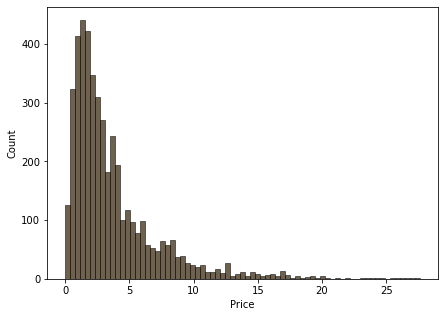

In [17]:
plt.figure(figsize=(7,5))
sns.histplot(data = prices[prices.Price<prices.Price.quantile(0.99)] , x='Price', color='#3D2e12')
#plt.title('Histogram of Prices')
plt.savefig('priceshistogram.png', transparent=True)
plt.show()

### Products

In [18]:
products = df.groupby('Description')[['Amount']].sum()
products['Quantity'] = df.groupby('Description')[['Quantity']].sum()
products['Count'] = df.groupby('Description')[['Count']].count()
products = products.sort_values('Amount', ascending = False).head(10).reset_index()
products

,Description,Amount,Quantity,Count
0,REGENCY CAKESTAND 3 TIER,169912.76,13691,2036
1,WHITE HANGING HEART T-LIGHT HOLDER,160345.63,58692,3410
2,ASSORTED COLOUR BIRD ORNAMENT,72890.19,45236,1436
3,PAPER CHAIN KIT 50'S CHRISTMAS,58127.30,17205,984
4,JUMBO BAG RED RETROSPOT,56480.46,30748,1271
5,PARTY BUNTING,49664.12,10092,1031
6,ROTATING SILVER ANGELS T-LIGHT HLDR,47954.49,23037,358
7,EDWARDIAN PARASOL NATURAL,36925.26,7469,633
8,JUMBO BAG STRAWBERRY,36732.16,20002,1073
9,VINTAGE UNION JACK BUNTING,36023.71,4144,834


In [19]:
df[df.Description=='REGENCY CAKESTAND 3 TIER'].StockCode.value_counts()

22423    2036
Name: StockCode, dtype: int64

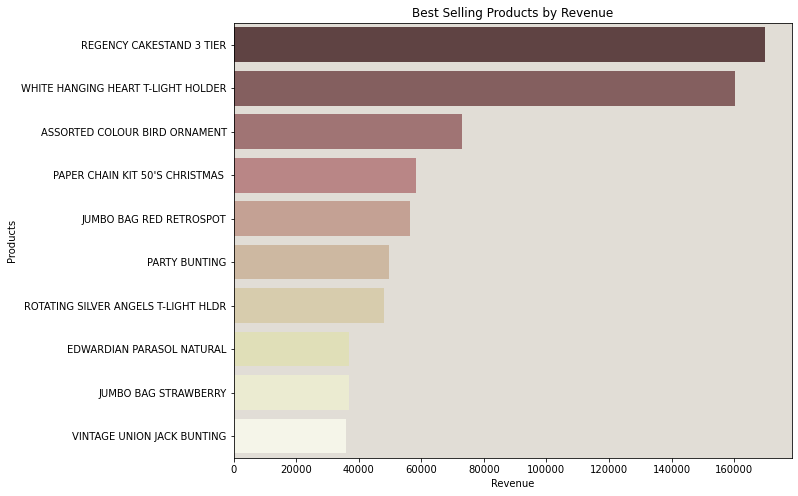

In [20]:
plt.figure(figsize=(10,8))

ax = plt.axes()
ax.set_facecolor('#E1ddd6')

sns.barplot(data = products, y='Description', x='Amount', palette = 'pink')

plt.title('Best Selling Products by Revenue')

plt.xlabel('Revenue')
plt.ylabel('Products')

plt.show()


### Orders

In [21]:
## I'm going to use Date insead of InvoiceDate. InvoiceData has a few minute differences for the same Invoice
## This dataframe gathers all the items of each invoice into 1 row
orders = df.groupby(['Registered', 'Invoice', 'Date', 'Country'])[['Amount']].sum()
orders['Quantity'] = df.groupby(['Registered', 'Invoice', 'Date', 'Country'])[['Quantity']].sum()
orders['Count'] = df.groupby(['Registered', 'Invoice', 'Date', 'Country'])[['Count']].count()
orders.reset_index(inplace=True)
orders

,Registered,Invoice,Date,Country,Amount,Quantity,Count
0,0,489525,2009-12-01,United Kingdom,1.40,2,2
1,0,489548,2009-12-01,United Kingdom,382.41,249,51
2,0,489596,2009-12-01,United Kingdom,17.00,2,1
3,0,489597,2009-12-01,United Kingdom,4450.63,971,501
4,0,489600,2009-12-01,United Kingdom,364.33,38,30
...,...,...,...,...,...,...,...
20617,1,538167,2010-12-09,United Kingdom,298.95,125,25
20618,1,538168,2010-12-09,United Kingdom,310.45,162,29
20619,1,538169,2010-12-09,United Kingdom,93.45,33,13
20620,1,538170,2010-12-09,United Kingdom,317.59,133,25


In [22]:
invoice_customerid = df[['Invoice', 'CustomerID']].set_index('Invoice').to_dict()['CustomerID']

orders['CustomerID'] = orders.Invoice.map(invoice_customerid)
orders['CustomerID'] = orders['CustomerID'].astype('object')

orders.rename(columns={'Count': 'UniqueProducts'}, inplace=True)

orders

,Registered,Invoice,Date,Country,Amount,Quantity,UniqueProducts,CustomerID
0,0,489525,2009-12-01,United Kingdom,1.40,2,2,20000
1,0,489548,2009-12-01,United Kingdom,382.41,249,51,20001
2,0,489596,2009-12-01,United Kingdom,17.00,2,1,20002
3,0,489597,2009-12-01,United Kingdom,4450.63,971,501,20003
4,0,489600,2009-12-01,United Kingdom,364.33,38,30,20004
...,...,...,...,...,...,...,...,...
20617,1,538167,2010-12-09,United Kingdom,298.95,125,25,14713
20618,1,538168,2010-12-09,United Kingdom,310.45,162,29,14702
20619,1,538169,2010-12-09,United Kingdom,93.45,33,13,13230
20620,1,538170,2010-12-09,United Kingdom,317.59,133,25,13969


In [23]:
orders.describe()

,Registered,Amount,Quantity,UniqueProducts
count,20622.000000,20622.000000,20622.000000,20622.000000
mean,0.919697,475.445991,282.853991,24.384686
std,0.271768,1073.644269,1381.579388,38.844602
min,0.000000,0.000000,1.000000,1.000000
25%,1.000000,147.127500,63.000000,6.000000
50%,1.000000,297.860000,144.000000,15.000000
75%,1.000000,483.040000,280.000000,28.000000
max,1.000000,49844.990000,87167.000000,674.000000


In [24]:
orders[orders.Quantity==orders.Quantity.max()]

,Registered,Invoice,Date,Country,Amount,Quantity,UniqueProducts,CustomerID
12573,1,518505,2010-08-09,France,11880.84,87167,45,14277
14881,1,524174,2010-09-27,United Kingdom,11880.84,87167,45,13687


In [25]:
orders[orders.CustomerID==13687]

,Registered,Invoice,Date,Country,Amount,Quantity,UniqueProducts,CustomerID
14881,1,524174,2010-09-27,United Kingdom,11880.84,87167,45,13687


In [26]:
orders[orders.CustomerID==14277]

,Registered,Invoice,Date,Country,Amount,Quantity,UniqueProducts,CustomerID
2645,1,491715,2009-12-13,France,215.42,230,14,14277
8387,1,507446,2010-05-10,France,151.52,166,15,14277
12573,1,518505,2010-08-09,France,11880.84,87167,45,14277
16781,1,528647,2010-10-24,France,254.44,148,53,14277
16784,1,528657,2010-10-24,France,134.94,117,28,14277


- On average a customer orders 283 items across 24 products paying £475.45.
- The largest orders each consisted of 87167 items across 45 products purchased by customers 14277 and 13687 at a cost of £11,880.84

In [27]:
orders.Registered.value_counts()

1    18966
0     1656
Name: Registered, dtype: int64

In [28]:
orders.describe(include='object')

,Invoice,Country,CustomerID
count,20622,20622,20622.0
unique,20622,40,5941.0
top,505342,United Kingdom,14911.0
freq,1,19102,183.0


In [29]:
orders.groupby('Registered')[['Quantity', 'UniqueProducts', 'Amount']].mean()

,Quantity,UniqueProducts,Amount
Registered,,,
0,191.904589,62.366546,703.496395
1,290.795160,21.068333,455.533966


<AxesSubplot:xlabel='Amount', ylabel='Count'>

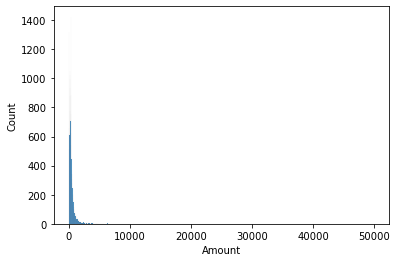

In [30]:
sns.histplot(data = orders['Amount'])

### SCV

#### For my single customer view I want have:
- Total quantity?
- Sum amount
- Number of orders <-count, 
- Duration between orders <-median, 

And look like this:

####  CustomerID | Number_of_orders | Revenue | AverageDuration | LastInvoiceDate| RecencyInDays | Registered

In [31]:
orders.groupby('CustomerID')[['Date']].max()

,Date
CustomerID,
12346.0,2010-06-28
12347.0,2010-12-07
12348.0,2010-09-27
12349.0,2010-10-28
12351.0,2010-11-29
...,...
21651.0,2010-12-09
21652.0,2010-12-09
21653.0,2010-12-09


In [32]:
orders.groupby('CustomerID')[['Invoice']].count().sort_values('Invoice', ascending=False)

,Invoice
CustomerID,
14911.0,183
17850.0,155
12748.0,133
15311.0,120
13089.0,109
...,...
17607.0,1
13205.0,1
13204.0,1


In [33]:
orders.groupby('CustomerID')[['Date']].diff().tail()

,Date
20617,14 days
20618,14 days
20619,11 days
20620,21 days
20621,217 days


In [34]:
orders[['CustomerID','Date','Invoice']]

,CustomerID,Date,Invoice
0,20000,2009-12-01,489525
1,20001,2009-12-01,489548
2,20002,2009-12-01,489596
3,20003,2009-12-01,489597
4,20004,2009-12-01,489600
...,...,...,...
20617,14713,2010-12-09,538167
20618,14702,2010-12-09,538168
20619,13230,2010-12-09,538169
20620,13969,2010-12-09,538170


In [35]:
orders = orders.sort_values(by=['CustomerID', 'Date']).reset_index(drop=True)
orders

,Registered,Invoice,Date,Country,Amount,Quantity,UniqueProducts,CustomerID
0,1,499763,2010-03-02,United Kingdom,27.05,5,5,12346
1,1,513774,2010-06-28,United Kingdom,142.31,19,19,12346
2,1,529924,2010-10-31,Iceland,611.53,509,40,12347
3,1,537626,2010-12-07,Iceland,711.79,319,31,12347
4,1,524140,2010-09-27,Finland,221.16,372,19,12348
...,...,...,...,...,...,...,...,...
20617,0,538127,2010-12-09,United Kingdom,7.50,2,2,21651
20618,0,538148,2010-12-09,United Kingdom,1667.95,224,110,21652
20619,0,538149,2010-12-09,United Kingdom,1825.48,238,112,21653
20620,0,538153,2010-12-09,United Kingdom,2268.88,352,120,21654


In [36]:
## To get the duration between orders for each customer
orders['ShiftCustomerID'] = orders.CustomerID.shift(1)
orders

,Registered,Invoice,Date,Country,Amount,Quantity,UniqueProducts,CustomerID,ShiftCustomerID
0,1,499763,2010-03-02,United Kingdom,27.05,5,5,12346,NaN
1,1,513774,2010-06-28,United Kingdom,142.31,19,19,12346,12346
2,1,529924,2010-10-31,Iceland,611.53,509,40,12347,12346
3,1,537626,2010-12-07,Iceland,711.79,319,31,12347,12347
4,1,524140,2010-09-27,Finland,221.16,372,19,12348,12347
...,...,...,...,...,...,...,...,...,...
20617,0,538127,2010-12-09,United Kingdom,7.50,2,2,21651,21650
20618,0,538148,2010-12-09,United Kingdom,1667.95,224,110,21652,21651
20619,0,538149,2010-12-09,United Kingdom,1825.48,238,112,21653,21652
20620,0,538153,2010-12-09,United Kingdom,2268.88,352,120,21654,21653


In [37]:
orders['Duration'] = orders.groupby('CustomerID')[['Date']].diff()
orders['Duration'] = orders['Duration'].dt.days
orders

,Registered,Invoice,Date,Country,Amount,Quantity,UniqueProducts,CustomerID,ShiftCustomerID,Duration
0,1,499763,2010-03-02,United Kingdom,27.05,5,5,12346,NaN,NaN
1,1,513774,2010-06-28,United Kingdom,142.31,19,19,12346,12346,118.0
2,1,529924,2010-10-31,Iceland,611.53,509,40,12347,12346,NaN
3,1,537626,2010-12-07,Iceland,711.79,319,31,12347,12347,37.0
4,1,524140,2010-09-27,Finland,221.16,372,19,12348,12347,NaN
...,...,...,...,...,...,...,...,...,...,...
20617,0,538127,2010-12-09,United Kingdom,7.50,2,2,21651,21650,NaN
20618,0,538148,2010-12-09,United Kingdom,1667.95,224,110,21652,21651,NaN
20619,0,538149,2010-12-09,United Kingdom,1825.48,238,112,21653,21652,NaN
20620,0,538153,2010-12-09,United Kingdom,2268.88,352,120,21654,21653,NaN


In [38]:
orders.isnull().sum()

Registered            0
Invoice               0
Date                  0
Country               0
Amount                0
Quantity              0
UniqueProducts        0
CustomerID            0
ShiftCustomerID       1
Duration           5941
dtype: int64

The nulls make sense as there are 5941 customers.

In [39]:
orders.groupby('CustomerID')[['Duration']].max().sort_values('Duration', ascending=False)

,Duration
CustomerID,
14865.0,364.0
15989.0,362.0
17998.0,357.0
16204.0,351.0
17193.0,351.0
...,...
21651.0,NaN
21652.0,NaN
21653.0,NaN


In [40]:
orders.groupby('CustomerID')[['Duration']].median().sort_values('Duration',ascending=False)

,Duration
CustomerID,
15989.0,362.0
17193.0,351.0
16204.0,351.0
17411.0,350.0
16720.0,346.0
...,...
21651.0,NaN
21652.0,NaN
21653.0,NaN


In [41]:
orders.groupby('CustomerID')[['Duration']].mean().sort_values('Duration',ascending=False)

,Duration
CustomerID,
15989.0,362.0
17193.0,351.0
16204.0,351.0
17411.0,350.0
16720.0,346.0
...,...
21651.0,NaN
21652.0,NaN
21653.0,NaN


In [42]:
mean_duration = orders.groupby('CustomerID')[['Duration']].mean().sort_values('Duration',ascending=False).reset_index()

mean_duration.isnull().sum()

CustomerID       0
Duration      3069
dtype: int64

In [43]:
median_duration = orders.groupby('CustomerID')[['Duration']].median().sort_values('Duration',ascending=False).reset_index()
#mean_duration[mean_duration.CustomerID==13915]
median_duration.isnull().sum()

CustomerID       0
Duration      3069
dtype: int64

In [44]:
mean_duration.describe()

,CustomerID,Duration
count,5941.000000,2872.000000
mean,16881.713011,70.859922
std,2857.549278,62.197608
min,12346.000000,0.000000
25%,14470.000000,29.107143
50%,16497.000000,52.666667
75%,20170.000000,91.000000
max,21655.000000,362.000000


In [45]:
median_duration.describe()

,CustomerID,Duration
count,5941.000000,2872.000000
mean,16881.713011,66.573816
std,2857.549278,64.183026
min,12346.000000,0.000000
25%,14470.000000,22.000000
50%,16497.000000,45.500000
75%,20170.000000,89.125000
max,21655.000000,362.000000


To measure the average time between orders I'm going to use the median.

In [46]:
orders.Date.dt.date.max()

datetime.date(2010, 12, 9)

In [47]:
today_date = datetime.datetime(2010, 12, 9)
today_date

datetime.datetime(2010, 12, 9, 0, 0)

In [48]:
## My Single Customer View would work better if I took the data from orders.
scv = orders.groupby('CustomerID')[['Invoice']].count()
scv.rename(columns={'Invoice':'InvoiceCount'}, inplace=True)

scv['Revenue'] = orders.groupby('CustomerID')['Amount'].sum()
scv['AverageMonthlyRevenue'] = scv['Revenue']/len(orders.Date.dt.month.unique())
scv['AverageDuration'] = orders.groupby('CustomerID')['Duration'].median()
scv['LastInvoiceDate'] = orders.groupby('CustomerID')['Date'].max()
scv['Recency'] = (today_date-scv['LastInvoiceDate']).dt.days
scv['Registered'] = np.where(scv.index<20000, 1, 0)

scv.reset_index(inplace=True)
scv['CustomerID'] = scv['CustomerID'].astype('object')
scv

,CustomerID,InvoiceCount,Revenue,AverageMonthlyRevenue,AverageDuration,LastInvoiceDate,Recency,Registered
0,12346,2,169.36,14.113333,118.0,2010-06-28,164,1
1,12347,2,1323.32,110.276667,37.0,2010-12-07,2,1
2,12348,1,221.16,18.430000,NaN,2010-09-27,73,1
3,12349,2,2221.14,185.095000,182.0,2010-10-28,42,1
4,12351,1,300.93,25.077500,NaN,2010-11-29,10,1
...,...,...,...,...,...,...,...,...
5936,21651,1,7.50,0.625000,NaN,2010-12-09,0,0
5937,21652,1,1667.95,138.995833,NaN,2010-12-09,0,0
5938,21653,1,1825.48,152.123333,NaN,2010-12-09,0,0
5939,21654,1,2268.88,189.073333,NaN,2010-12-09,0,0


In [49]:
## Where the average duration is null I am going to assume that they shop here once a year
scv.AverageDuration = scv.AverageDuration.fillna(365.0)

In [50]:
scv.Registered.value_counts()

1    4285
0    1656
Name: Registered, dtype: int64

In [51]:
scv.groupby('Registered').Revenue.sum()

Registered
0    1164990.03
1    8639657.20
Name: Revenue, dtype: float64

In [52]:
scv.describe(percentiles=[.25, .5, .75, .95, .99])

,InvoiceCount,Revenue,AverageMonthlyRevenue,AverageDuration,Recency,Registered
count,5941.000000,5941.000000,5941.000000,5941.000000,5941.000000,5941.000000
mean,3.471133,1650.336177,137.528015,220.734725,114.317455,0.721259
std,6.914148,7589.457414,632.454784,155.675569,108.261951,0.448418
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,175.850000,14.654167,48.000000,24.000000,0.000000
50%,1.000000,521.660000,43.471667,365.000000,70.000000,1.000000
75%,4.000000,1456.260000,121.355000,365.000000,191.000000,1.000000
95%,11.000000,5185.510000,432.125833,365.000000,333.000000,1.000000
99%,26.000000,16613.796000,1384.483000,365.000000,370.000000,1.000000
max,183.000000,349164.350000,29097.029167,365.000000,373.000000,1.000000


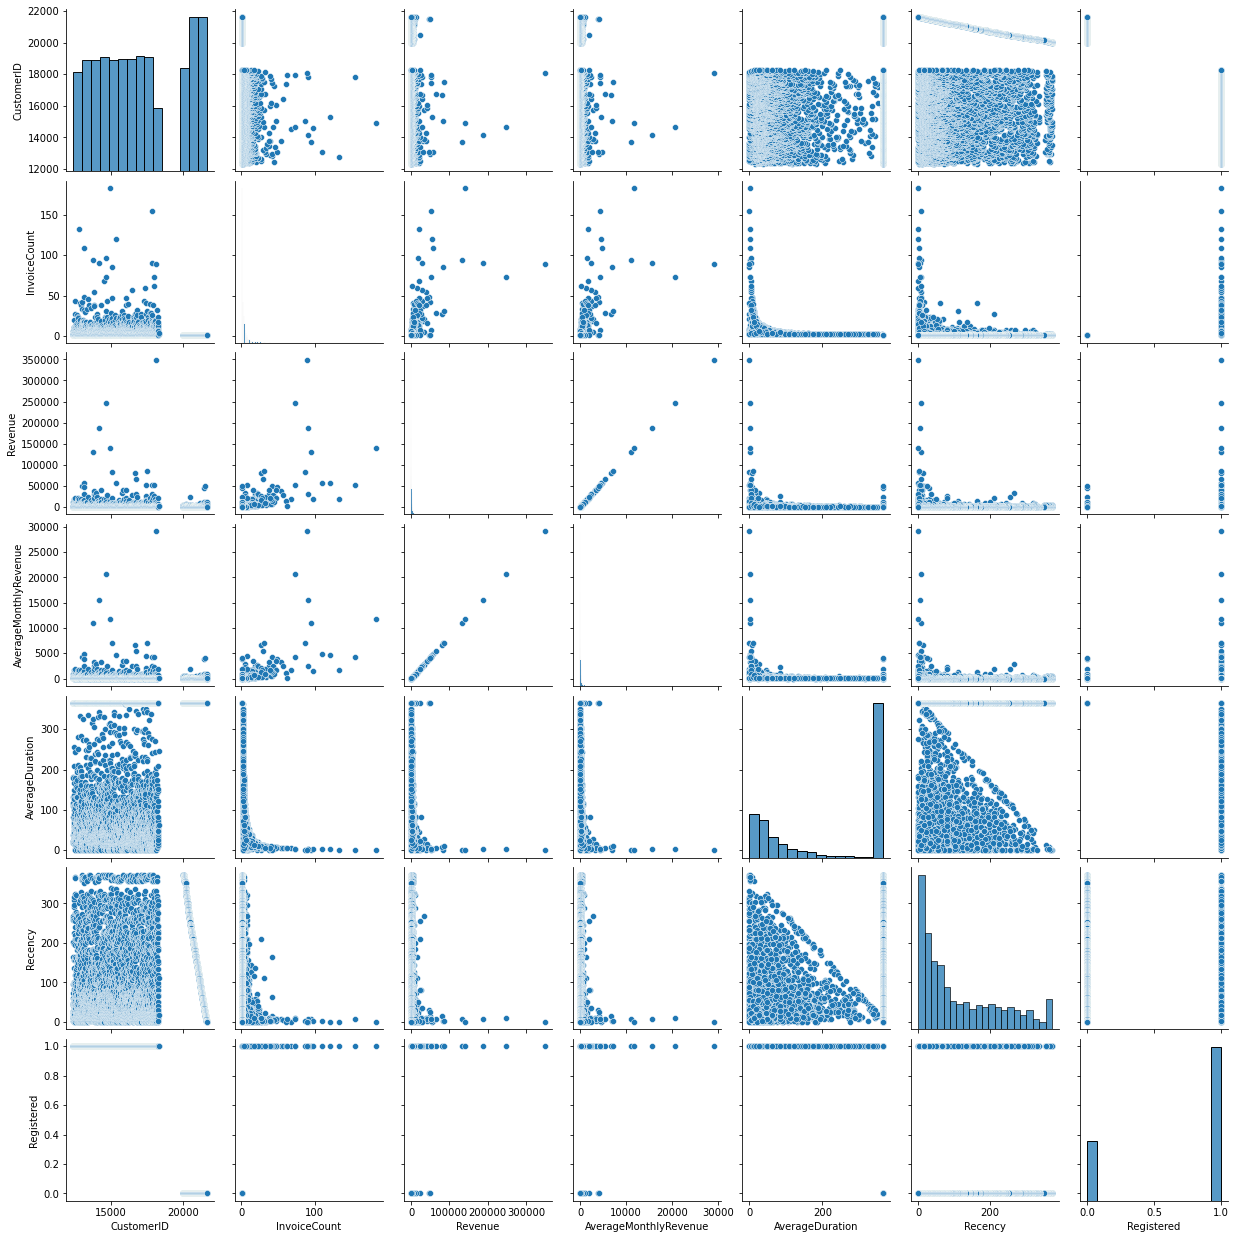

In [53]:
sns.pairplot(scv)

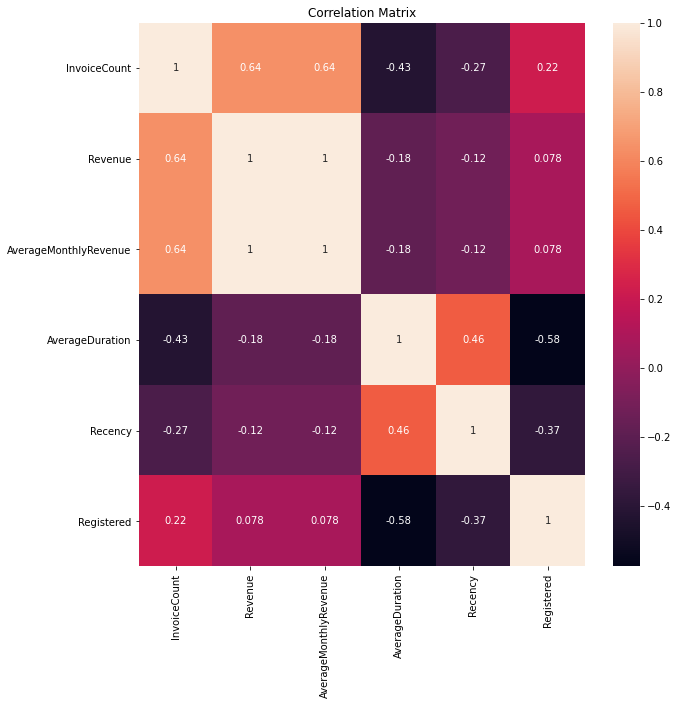

In [54]:
plt.figure(figsize=(10,10))
sns.heatmap(scv.corr(),annot=True)
plt.title('Correlation Matrix')
plt.show()

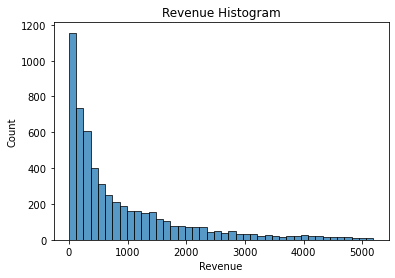

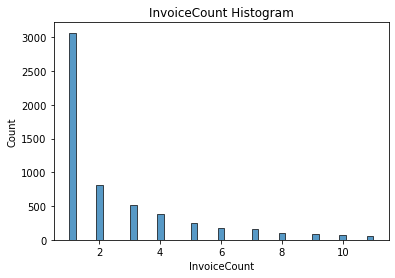

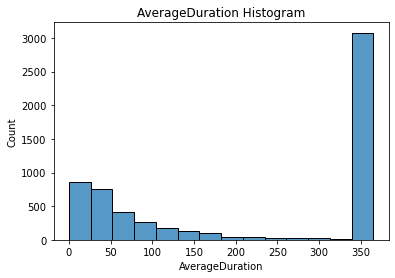

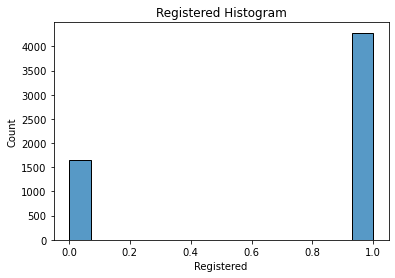

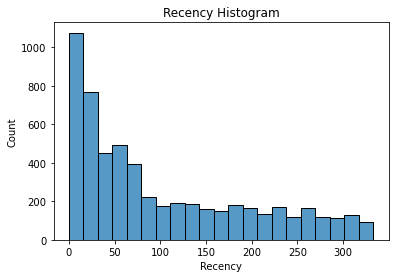

In [55]:
cols = ['Revenue', 'InvoiceCount', 'AverageDuration', 'Registered', 'Recency']
for i in cols:
    sns.histplot(data = scv[scv[i]<=scv[i].quantile(0.95)], x=i)
    plt.title(f'{i} Histogram')
    plt.show()

### Time

In [56]:
ts = orders.groupby('Date')[['Amount']].sum()
ts['InvoiceCount'] = orders.groupby('Date')['Invoice'].count()
ts.rename(columns={'Amount':'Revenue'}, inplace=True)
ts = ts[ts.index.date<datetime.date(2010,12,1)]
ts

,Revenue,InvoiceCount
Date,,
2009-12-01,52438.61,117
2009-12-02,61873.10,115
2009-12-03,73059.78,124
2009-12-04,39349.21,88
2009-12-05,9803.05,30
...,...,...
2010-11-25,71385.94,151
2010-11-26,39002.80,88
2010-11-28,26688.66,90


In [57]:
ts.resample('M').sum()

,Revenue,InvoiceCount
Date,,
2009-12-31,797901.16,1666
2010-01-31,612297.42,1049
2010-02-28,537909.67,1189
2010-03-31,761705.98,1654
2010-04-30,646340.93,1437
2010-05-31,643492.03,1489
2010-06-30,696583.19,1620
2010-07-31,632994.32,1509
2010-08-31,674037.72,1405


In [58]:
## There are some missing days
datetime.date(2010,11,30)-datetime.date(2009,12,1)

datetime.timedelta(days=364)

In [59]:
ts = ts.resample('D').sum()
ts

,Revenue,InvoiceCount
Date,,
2009-12-01,52438.61,117
2009-12-02,61873.10,115
2009-12-03,73059.78,124
2009-12-04,39349.21,88
2009-12-05,9803.05,30
...,...,...
2010-11-26,39002.80,88
2010-11-27,0.00,0
2010-11-28,26688.66,90


In [60]:
ts.describe()

,Revenue,InvoiceCount
count,365.000000,365.000000
mean,25744.225479,54.213699
std,18665.947064,33.381138
min,0.000000,0.000000
25%,15803.310000,38.000000
50%,24817.590000,57.000000
75%,34605.320000,75.000000
max,103336.350000,151.000000


In [61]:
ts[ts.index.month==12]

,Revenue,InvoiceCount
Date,,
2009-12-01,52438.61,117
2009-12-02,61873.10,115
2009-12-03,73059.78,124
2009-12-04,39349.21,88
2009-12-05,9803.05,30
2009-12-06,24285.02,74
2009-12-07,42957.47,101
2009-12-08,48694.71,105
2009-12-09,38870.31,87


In [62]:
ts[ts.index.month==6]

,Revenue,InvoiceCount
Date,,
2010-06-01,15546.36,46
2010-06-02,15993.18,45
2010-06-03,29364.39,66
2010-06-04,20297.33,51
2010-06-05,0.00,0
2010-06-06,25400.65,68
2010-06-07,48854.78,103
2010-06-08,51277.99,77
2010-06-09,38095.62,68


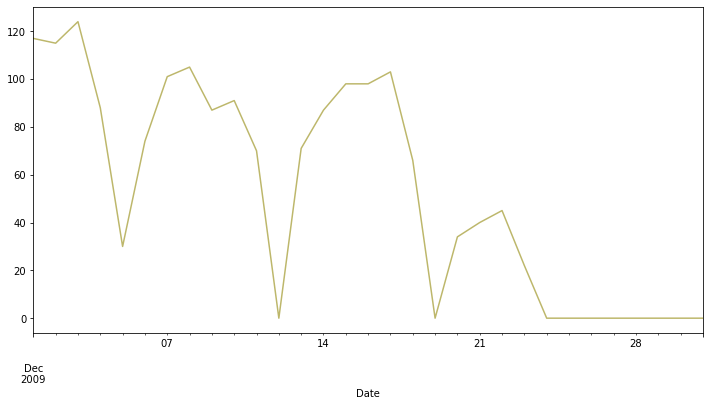

In [63]:
plt.figure(figsize=(12,6))
ts[ts.index.month==12].InvoiceCount.plot(color='darkkhaki')
plt.show();

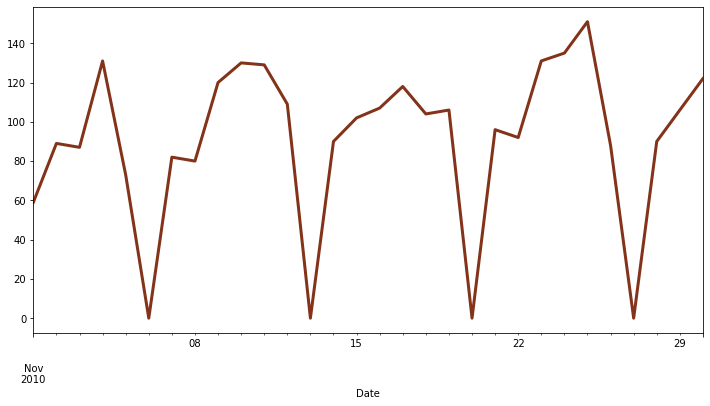

In [64]:
plt.figure(figsize=(12,6))
ts[ts.index.month==11].InvoiceCount.plot(color='#833319', linewidth=3)
plt.savefig('Novemeber.png', transparent=True)
plt.show()

In [65]:
## Monday=0, Sunday=6
ts['Weekday'] = ts.index.weekday
ts

,Revenue,InvoiceCount,Weekday
Date,,,
2009-12-01,52438.61,117,1
2009-12-02,61873.10,115,2
2009-12-03,73059.78,124,3
2009-12-04,39349.21,88,4
2009-12-05,9803.05,30,5
...,...,...,...
2010-11-26,39002.80,88,4
2010-11-27,0.00,0,5
2010-11-28,26688.66,90,6


In [66]:
ts[ts.InvoiceCount==0].tail(20)

,Revenue,InvoiceCount,Weekday
Date,,,
2010-07-24,0.0,0,5
2010-07-31,0.0,0,5
2010-08-07,0.0,0,5
2010-08-14,0.0,0,5
2010-08-21,0.0,0,5
2010-08-28,0.0,0,5
2010-08-30,0.0,0,0
2010-09-04,0.0,0,5
2010-09-11,0.0,0,5


In [67]:
ts.groupby('Weekday')[['Revenue', 'InvoiceCount']].agg(['mean','sum'])

Revenue             InvoiceCount      
                 mean         sum         mean   sum
Weekday                                             
0        33341.021923  1733733.14    61.000000  3172
1        33871.093208  1795167.94    68.792453  3646
2        30633.900962  1592962.85    66.384615  3452
3        36127.291154  1878619.14    76.365385  3971
4        26913.337885  1399493.57    55.673077  2895
5          188.520192     9803.05     0.576923    30
6        18978.127115   986862.61    50.423077  2622

In [68]:
ts[(ts.Weekday==5) & (ts.InvoiceCount>0)]

,Revenue,InvoiceCount,Weekday
Date,,,
2009-12-05,9803.05,30,5


In [69]:
ts.resample('D').interpolate()[::7].Revenue.max()

70899.89999999995

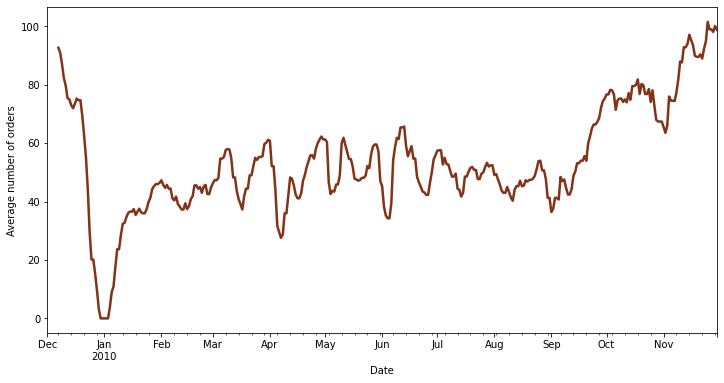

In [70]:
plt.figure(figsize=(12,6))
ts.InvoiceCount.rolling(7).mean().plot(color='#833319', linewidth=2.5)
plt.ylabel('Average number of orders')
plt.savefig('orders over time.png', transparent=True)
plt.show();

### Country

In [71]:
df.Country.nunique()

40

In [72]:
df.groupby('Country')[['Amount']].sum().round(2).sort_values('Amount', ascending=False).head(10)

,Amount
Country,
United Kingdom,8452924.42
EIRE,357696.08
Netherlands,266061.67
Germany,182889.93
France,132257.71
Denmark,50348.85
Sweden,49490.31
Spain,42854.91
Switzerland,41182.39
